In [1]:
# importing libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Step 1: Importing Data

In [2]:
leads=pd.read_csv('Leads.csv')

In [3]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step 2: Inspecting the Dataframe

In [4]:
leads.shape

(9240, 37)

In [5]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# checking the % of null values
round(leads.isnull().sum()/len(leads)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [8]:
# We can remove Prospect ID from the dataframe as it doesn't impart any useful information
leads.drop('Prospect ID',axis=1,inplace=True)

In [9]:
# There are some variables containing 'Select' as value which is equivalent to null values, hence replacing 'Select' with nulls
leads=leads.replace('Select',np.nan)
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step 3: Data Cleaning and EDA

In [10]:
# again checking the null values after replacing 'Select' with null values
round(leads.isnull().sum()/len(leads)*100,2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [11]:
# dropping columns having null values > 45%
leads.drop(['How did you hear about X Education','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1,inplace=True)

In [12]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


#### Imputing null values

In [13]:
# 1. imputing 'TotalVisits' with median value
leads['TotalVisits']=leads['TotalVisits'].fillna(leads['TotalVisits'].median())
leads['TotalVisits'].isnull().sum()

0

In [14]:
# 2. imputing 'Page Views Per Visit' with median value
leads['Page Views Per Visit']=leads['Page Views Per Visit'].fillna(leads['Page Views Per Visit'].median())
leads['Page Views Per Visit'].isnull().sum()

0

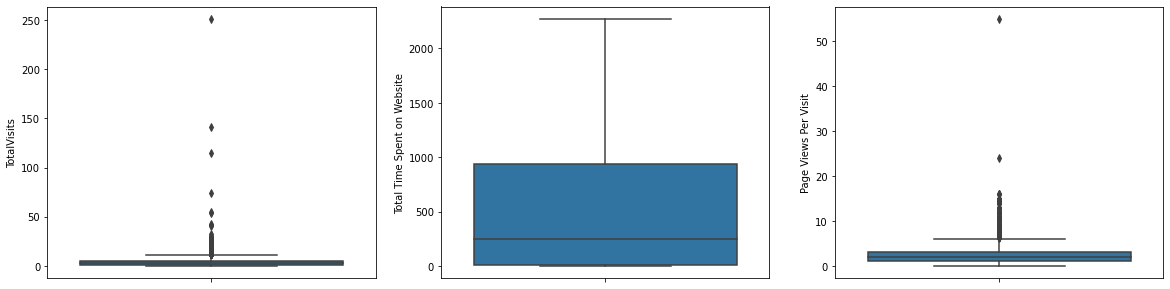

In [15]:
# There are outliers present in 'TotalVisits' and 'Page Views Per Visit' so checking the same
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(data=leads,y='TotalVisits')
plt.subplot(1,3,2)
sns.boxplot(data=leads,y='Total Time Spent on Website')
plt.subplot(1,3,3)
sns.boxplot(data=leads,y='Page Views Per Visit')
plt.show()

In [16]:
np.percentile(leads['TotalVisits'], 95)

10.0

In [17]:
leads=leads.loc[leads['TotalVisits']<10.0,:]
leads.shape

(8773, 29)

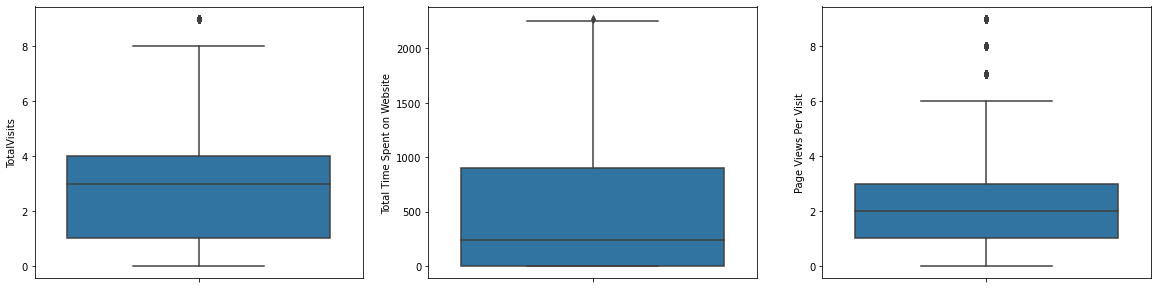

In [18]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(data=leads,y='TotalVisits')
plt.subplot(1,3,2)
sns.boxplot(data=leads,y='Total Time Spent on Website')
plt.subplot(1,3,3)
sns.boxplot(data=leads,y='Page Views Per Visit')
plt.show()

Still few outliers are present in variables 'TotalVisits' and 'Page Views Per Visit' but we are ok with them.

In [19]:
leads.isnull().sum()/len(leads)*100

Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.410350
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       0.000000
Total Time Spent on Website                       0.000000
Page Views Per Visit                              0.000000
Last Activity                                     1.174057
Country                                          27.972187
Specialization                                   37.661005
What is your current occupation                  29.340021
What matters most to you in choosing a course    29.545195
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [20]:
leads['Lead Source'].value_counts()

Google               2742
Direct Traffic       2391
Olark Chat           1739
Organic Search       1006
Reference             532
Welingak Website      141
Referral Sites        105
Facebook               55
bing                    6
google                  5
Click2call              3
Social Media            2
Live Chat               2
youtubechannel          1
Press_Release           1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [21]:
# 3. imputing the null value in lead source with mode 
leads['Lead Source']=leads['Lead Source'].fillna(leads['Lead Source'].mode()[0])
leads['Lead Source'].isnull().sum()

0

In [22]:
# replacing 'google' with 'Google' as both are same
leads['Lead Source']=leads['Lead Source'].replace('google','Google')
leads['Lead Source'].value_counts()

Google               2783
Direct Traffic       2391
Olark Chat           1739
Organic Search       1006
Reference             532
Welingak Website      141
Referral Sites        105
Facebook               55
bing                    6
Click2call              3
Social Media            2
Live Chat               2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
Press_Release           1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [23]:
# 4. imputing 'Last Activity' with mode 
leads['Last Activity']=leads['Last Activity'].fillna(leads['Last Activity'].mode()[0])
leads['Last Activity'].isnull().sum()

0

In [24]:
# 5. imputing 'Country' with mode
leads['Country']=leads['Country'].fillna(leads['Country'].mode()[0])
leads['Country'].isnull().sum()

0

In [25]:
# 6. imputing 'Specialization':It consists of 36 % of null values so we will create new category named as Not Selected for nulls
leads['Specialization']=leads['Specialization'].fillna('Not Selected')
leads['Specialization'].isnull().sum()

0

In [26]:
leads['Specialization'].value_counts()

Not Selected                         3304
Finance Management                    921
Marketing Management                  803
Human Resource Management             791
Operations Management                 476
Business Administration               375
IT Projects Management                348
Supply Chain Management               323
Banking, Investment And Insurance     312
Media and Advertising                 186
Travel and Tourism                    173
International Business                167
Healthcare Management                 142
Hospitality Management                105
E-COMMERCE                            103
Retail Management                      91
Rural and Agribusiness                 64
E-Business                             55
Services Excellence                    34
Name: Specialization, dtype: int64

In [27]:
# Combining all Management specialization in a single category named 'Management_Specialization'
leads['Specialization']=leads['Specialization'].replace(['Finance Management','Human Resource Management','Marketing Management','Operations Management','IT Projects Management','Supply Chain Management','Healthcare Management','Hospitality Management','Retail Management'],'Management_Specialization')
leads['Specialization'].value_counts()

Management_Specialization            4000
Not Selected                         3304
Business Administration               375
Banking, Investment And Insurance     312
Media and Advertising                 186
Travel and Tourism                    173
International Business                167
E-COMMERCE                            103
Rural and Agribusiness                 64
E-Business                             55
Services Excellence                    34
Name: Specialization, dtype: int64

In [28]:
# 7. imputing 'What is your current occupation' with mode
leads['What is your current occupation']=leads['What is your current occupation'].fillna(leads['What is your current occupation'].mode()[0])
leads['What is your current occupation'].isnull().sum()

0

In [29]:
leads['What is your current occupation'].value_counts()

Unemployed              7875
Working Professional     666
Student                  203
Other                     13
Housewife                 10
Businessman                6
Name: What is your current occupation, dtype: int64

In [30]:
# We can combine 'Other' and 'Housewife' with 'Unemployed' category 
leads['What is your current occupation']=leads['What is your current occupation'].replace(['Other','Housewife'],'Unemployed')
leads['What is your current occupation'].value_counts()

Unemployed              7898
Working Professional     666
Student                  203
Businessman                6
Name: What is your current occupation, dtype: int64

In [31]:
# 8. imputing 'What matters most to you in choosing a course' with mode i.e 'Better Career Prospects'
leads['What matters most to you in choosing a course']=leads['What matters most to you in choosing a course'].fillna(leads['What matters most to you in choosing a course'].mode()[0])
leads['What matters most to you in choosing a course'].isnull().sum()

0

In [32]:
# 9. Imputing 'Tags': 36% values are null so we will create separate category as 'Others' for them and combine 'switched off','Busy',
# 'invalid number', 'wrong number given', 'opp hangup' in single category as 'Not Responding'
leads['Tags']=leads['Tags'].fillna('Others')
leads['Tags']=leads['Tags'].replace(['switched off','Busy','invalid number', 'wrong number given', 'opp hangup'],'Not Responding')
leads['Tags'].value_counts()

Others                                               3206
Will revert after reading the email                  1960
Ringing                                              1139
Not Responding                                        559
Interested in other courses                           485
Already a student                                     450
Closed by Horizzon                                    320
Lost to EINS                                          164
Not doing further education                           134
Interested  in full time MBA                          114
Graduation in progress                                106
Diploma holder (Not Eligible)                          61
number not provided                                    27
in touch with EINS                                     12
Lost to Others                                          7
Still Thinking                                          6
In confusion whether part time or DLP                   5
Interested in 

In [33]:
# 10. Imputing 'City': 41% values are null so creating a separate category as 'Not Specified' for them
leads['City']=leads['City'].fillna('Not Specified')
leads['City'].isnull().sum()

0

In [34]:
# Now checking the null values after imputation
leads.isnull().sum()/len(leads)*100

Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

#### Checking for data imbalance

In [35]:
leads['Lead Origin'].value_counts(normalize=True)

Landing Page Submission    0.517953
API                        0.394278
Lead Add Form              0.081386
Lead Import                0.006269
Quick Add Form             0.000114
Name: Lead Origin, dtype: float64

In [36]:
leads['Lead Source'].value_counts(normalize=True)

Google               0.317223
Direct Traffic       0.272541
Olark Chat           0.198222
Organic Search       0.114670
Reference            0.060641
Welingak Website     0.016072
Referral Sites       0.011969
Facebook             0.006269
bing                 0.000684
Click2call           0.000342
Social Media         0.000228
Live Chat            0.000228
Pay per Click Ads    0.000114
blog                 0.000114
WeLearn              0.000114
welearnblog_Home     0.000114
youtubechannel       0.000114
testone              0.000114
Press_Release        0.000114
NC_EDM               0.000114
Name: Lead Source, dtype: float64

In [37]:
leads['Do Not Email'].value_counts(normalize=True)

No     0.921578
Yes    0.078422
Name: Do Not Email, dtype: float64

In [38]:
leads['Do Not Call'].value_counts(normalize=True)

No     0.999772
Yes    0.000228
Name: Do Not Call, dtype: float64

In [39]:
leads['Converted'].value_counts(normalize=True)

0    0.6194
1    0.3806
Name: Converted, dtype: float64

In [40]:
leads['Last Activity'].value_counts(normalize=True)

Email Opened                    0.384247
SMS Sent                        0.299555
Olark Chat Conversation         0.108401
Page Visited on Website         0.058931
Converted to Lead               0.048672
Email Bounced                   0.036931
Email Link Clicked              0.029066
Form Submitted on Website       0.012538
Unreachable                     0.010031
Unsubscribed                    0.006611
Had a Phone Conversation        0.002850
Approached upfront              0.001026
View in browser link Clicked    0.000456
Email Received                  0.000228
Email Marked Spam               0.000228
Visited Booth in Tradeshow      0.000114
Resubscribed to emails          0.000114
Name: Last Activity, dtype: float64

In [41]:
leads['Country'].value_counts(normalize=True)

India                   0.968996
United States           0.007523
United Arab Emirates    0.005699
Singapore               0.002622
Saudi Arabia            0.002280
Australia               0.001482
United Kingdom          0.001482
Qatar                   0.001140
Bahrain                 0.000798
Hong Kong               0.000798
Oman                    0.000684
France                  0.000570
Canada                  0.000456
unknown                 0.000456
Germany                 0.000456
Nigeria                 0.000456
Kuwait                  0.000456
South Africa            0.000342
China                   0.000228
Sweden                  0.000228
Belgium                 0.000228
Ghana                   0.000228
Asia/Pacific Region     0.000228
Uganda                  0.000228
Bangladesh              0.000228
Italy                   0.000228
Philippines             0.000228
Liberia                 0.000114
Vietnam                 0.000114
Denmark                 0.000114
Switzerlan

In [42]:
leads['Specialization'].value_counts(normalize=True)

Management_Specialization            0.455944
Not Selected                         0.376610
Business Administration              0.042745
Banking, Investment And Insurance    0.035564
Media and Advertising                0.021201
Travel and Tourism                   0.019720
International Business               0.019036
E-COMMERCE                           0.011741
Rural and Agribusiness               0.007295
E-Business                           0.006269
Services Excellence                  0.003876
Name: Specialization, dtype: float64

In [43]:
leads['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.900262
Working Professional    0.075915
Student                 0.023139
Businessman             0.000684
Name: What is your current occupation, dtype: float64

In [44]:
leads['What matters most to you in choosing a course'].value_counts(normalize=True)

Better Career Prospects      0.999658
Flexibility & Convenience    0.000228
Other                        0.000114
Name: What matters most to you in choosing a course, dtype: float64

In [45]:
leads['Search'].value_counts(normalize=True)

No     0.999202
Yes    0.000798
Name: Search, dtype: float64

In [46]:
leads['Magazine'].value_counts(normalize=True)

No    1.0
Name: Magazine, dtype: float64

In [47]:
leads['Newspaper Article'].value_counts(normalize=True)

No     0.999886
Yes    0.000114
Name: Newspaper Article, dtype: float64

In [48]:
leads['X Education Forums'].value_counts(normalize=True)

No    1.0
Name: X Education Forums, dtype: float64

In [49]:
leads['Newspaper'].value_counts(normalize=True)

No    1.0
Name: Newspaper, dtype: float64

In [50]:
leads['Digital Advertisement'].value_counts(normalize=True)

No     0.999658
Yes    0.000342
Name: Digital Advertisement, dtype: float64

In [51]:
leads['Through Recommendations'].value_counts(normalize=True)

No     0.99943
Yes    0.00057
Name: Through Recommendations, dtype: float64

In [52]:
leads['Receive More Updates About Our Courses'].value_counts(normalize=True)

No    1.0
Name: Receive More Updates About Our Courses, dtype: float64

In [53]:
leads['Tags'].value_counts(normalize=True)

Others                                               0.365439
Will revert after reading the email                  0.223413
Ringing                                              0.129830
Not Responding                                       0.063718
Interested in other courses                          0.055283
Already a student                                    0.051294
Closed by Horizzon                                   0.036476
Lost to EINS                                         0.018694
Not doing further education                          0.015274
Interested  in full time MBA                         0.012994
Graduation in progress                               0.012083
Diploma holder (Not Eligible)                        0.006953
number not provided                                  0.003078
in touch with EINS                                   0.001368
Lost to Others                                       0.000798
Still Thinking                                       0.000684
In confu

In [54]:
leads['Update me on Supply Chain Content'].value_counts(normalize=True)

No    1.0
Name: Update me on Supply Chain Content, dtype: float64

In [55]:
leads['Get updates on DM Content'].value_counts(normalize=True)

No    1.0
Name: Get updates on DM Content, dtype: float64

In [56]:
leads['City'].value_counts(normalize=True)

Not Specified                  0.408868
Mumbai                         0.341502
Thane & Outskirts              0.079106
Other Cities                   0.073293
Other Cities of Maharashtra    0.049242
Other Metro Cities             0.040009
Tier II Cities                 0.007979
Name: City, dtype: float64

In [57]:
leads['I agree to pay the amount through cheque'].value_counts(normalize=True)

No    1.0
Name: I agree to pay the amount through cheque, dtype: float64

In [58]:
leads['A free copy of Mastering The Interview'].value_counts(normalize=True)

No     0.699875
Yes    0.300125
Name: A free copy of Mastering The Interview, dtype: float64

In [59]:
leads['Last Notable Activity'].value_counts(normalize=True)

Modified                        0.374786
Email Opened                    0.305483
SMS Sent                        0.236977
Page Visited on Website         0.026901
Olark Chat Conversation         0.019948
Email Link Clicked              0.018580
Email Bounced                   0.006725
Unsubscribed                    0.005129
Unreachable                     0.003534
Had a Phone Conversation        0.001140
Email Marked Spam               0.000228
Approached upfront              0.000114
Resubscribed to emails          0.000114
View in browser link Clicked    0.000114
Form Submitted on Website       0.000114
Email Received                  0.000114
Name: Last Notable Activity, dtype: float64

We can see from above that there are some variables showing data imbalance, so we will drop them as they don't impart any valuable information.
Hence dropping the variables: 'Do Not Call', 'Country', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'  

In [60]:
leads.drop(['Do Not Call', 'Country', 'What matters most to you in choosing a course', 'Search', 'Magazine', 
            'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 
            'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'],axis=1,inplace=True)

In [61]:
# In final dataframe, there are 8773 rows and 15 columns
leads.shape

(8773, 15)

In [62]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Selected,Unemployed,Interested in other courses,Not Specified,No,Modified
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Selected,Unemployed,Ringing,Not Specified,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Selected,Unemployed,Will revert after reading the email,Mumbai,No,Modified


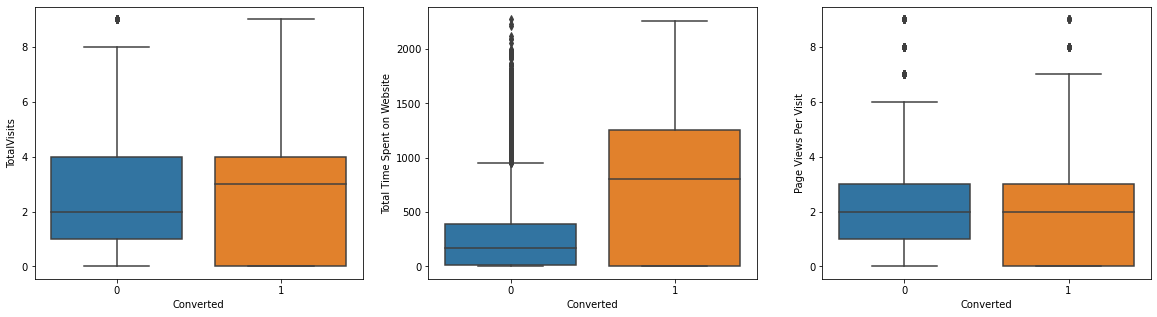

In [63]:
# visualizing continuous variables
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(data=leads,y='TotalVisits',x='Converted')
plt.subplot(1,3,2)
sns.boxplot(data=leads,y='Total Time Spent on Website',x='Converted')
plt.subplot(1,3,3)
sns.boxplot(data=leads,y='Page Views Per Visit',x='Converted')
plt.show()

Inference: 
- Median of Total Visits is more for converted ones. People visiting the site more have higher chances of conversion.
- People who have converted have spent more time on the website and the median time spent on website is more in case of converted as compared to non-converted. 
- Median for no. of pages viewed per visit is same for both converted and non-converted

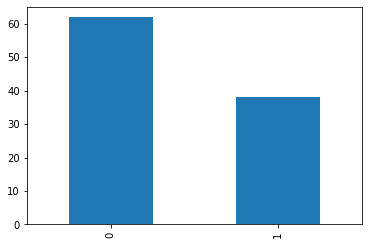

In [64]:
# visualizing categorical variables
round(leads['Converted'].value_counts(normalize=True)*100,2).plot.bar()
plt.show()

Inference: Lead conversion rate is approximately 38 %.

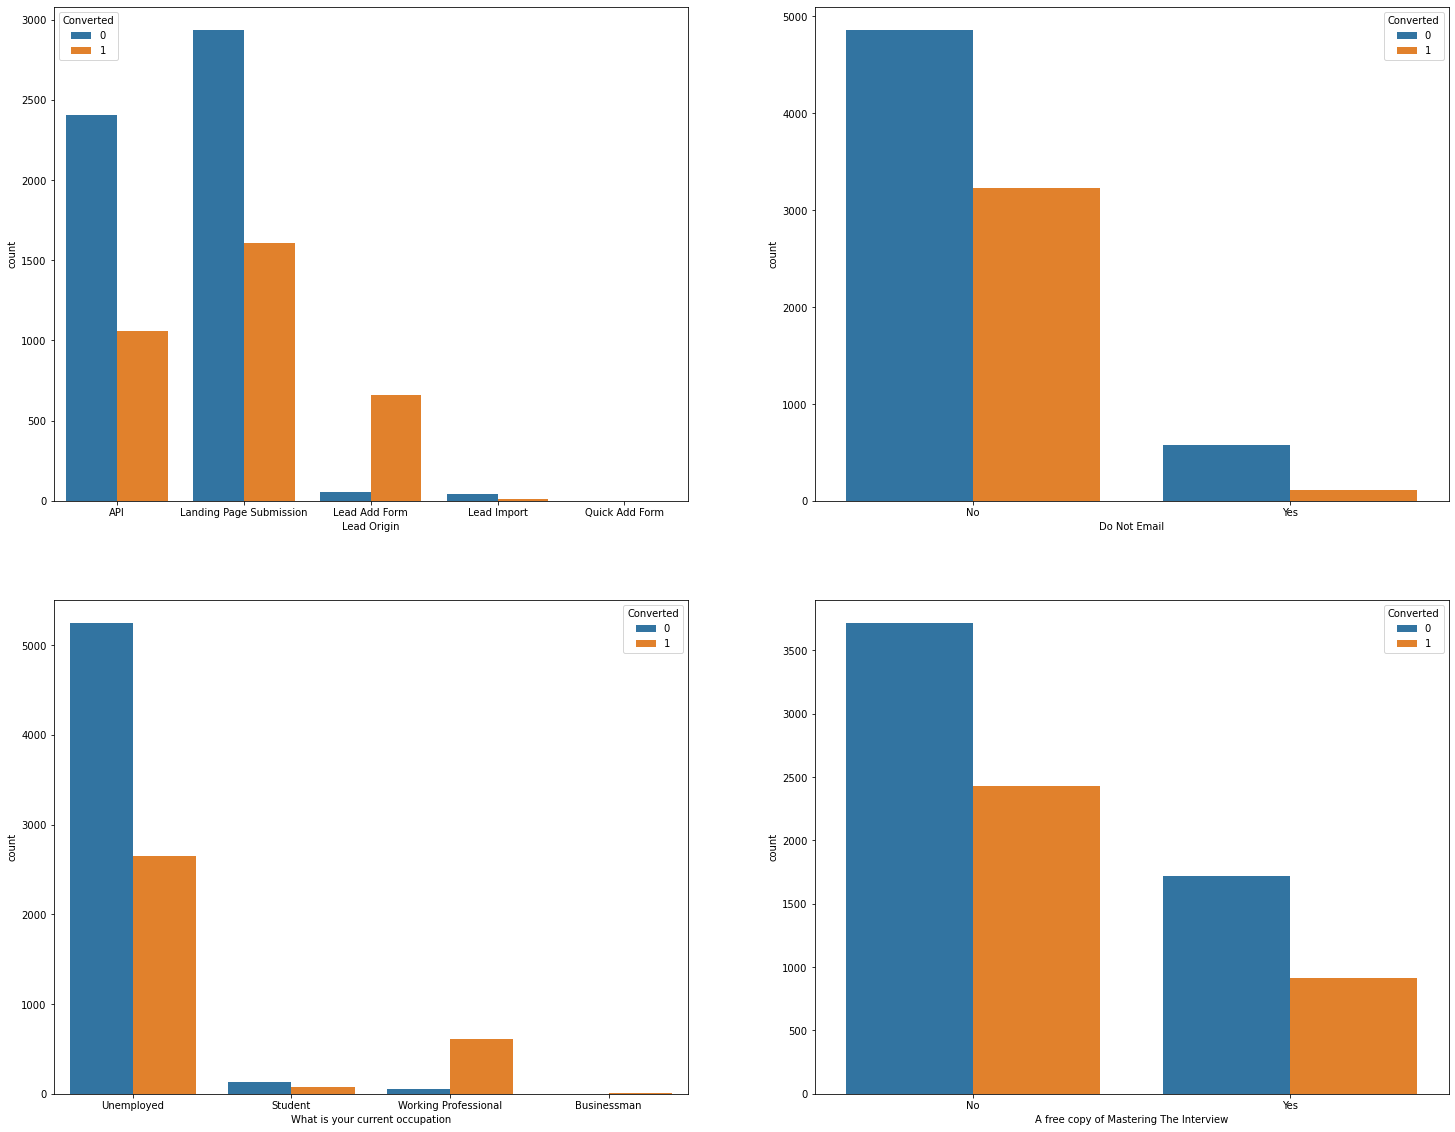

In [65]:
plt.figure(figsize=(25,20))
plt.subplot(2,2,1)
sns.countplot(data=leads,x='Lead Origin',hue='Converted')
plt.subplot(2,2,2)
sns.countplot(data=leads,x='Do Not Email',hue='Converted')
plt.subplot(2,2,3)
sns.countplot(data=leads,x='What is your current occupation',hue='Converted')
plt.subplot(2,2,4)
sns.countplot(data=leads,x='A free copy of Mastering The Interview',hue='Converted')
plt.show()

Inference:
- Lead Origin: Lead conversion is highest for Lead Add Form
- Do Not Email: Higher conversion is for people responding as 'No'
- Working Professionals have higher conversion rate

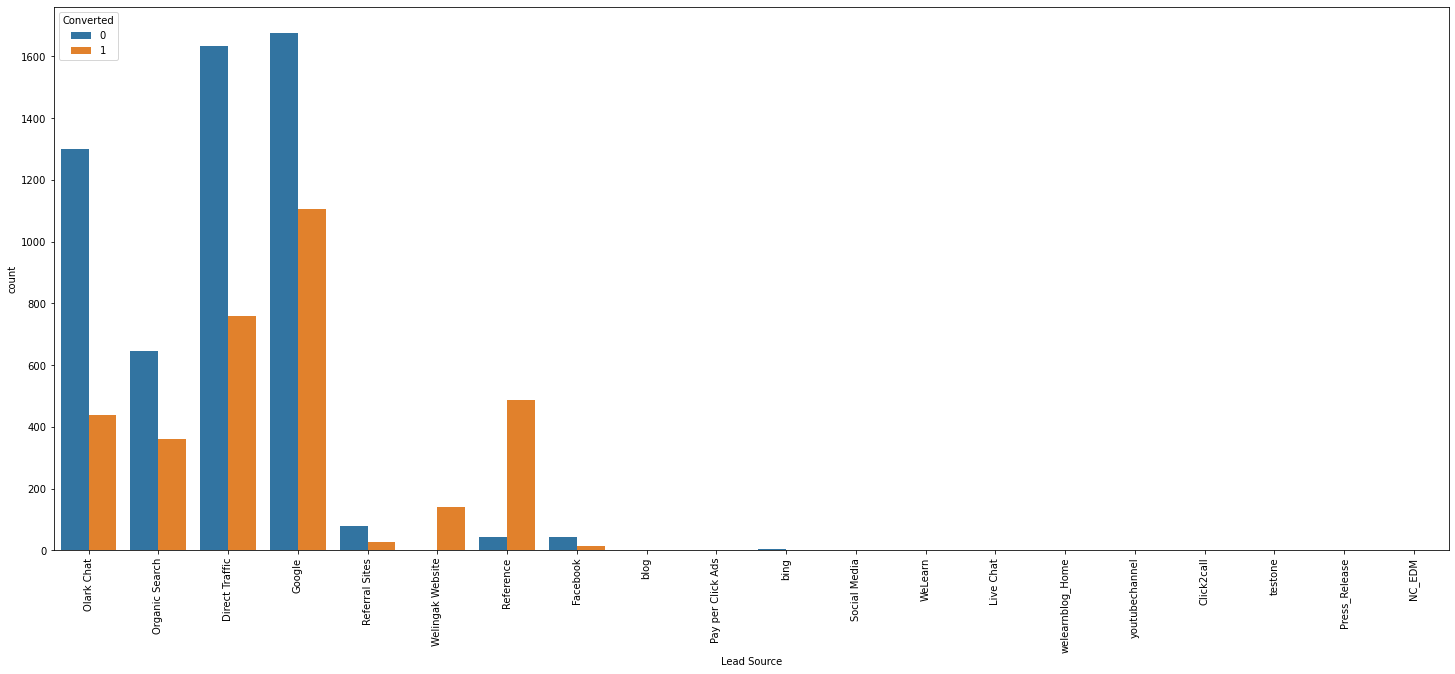

In [66]:
plt.figure(figsize=(25,10))
sns.countplot(data=leads,x='Lead Source',hue='Converted')
plt.xticks(rotation=90)
plt.show()

Lead conversion is higher through Reference, Welingak Website, Google

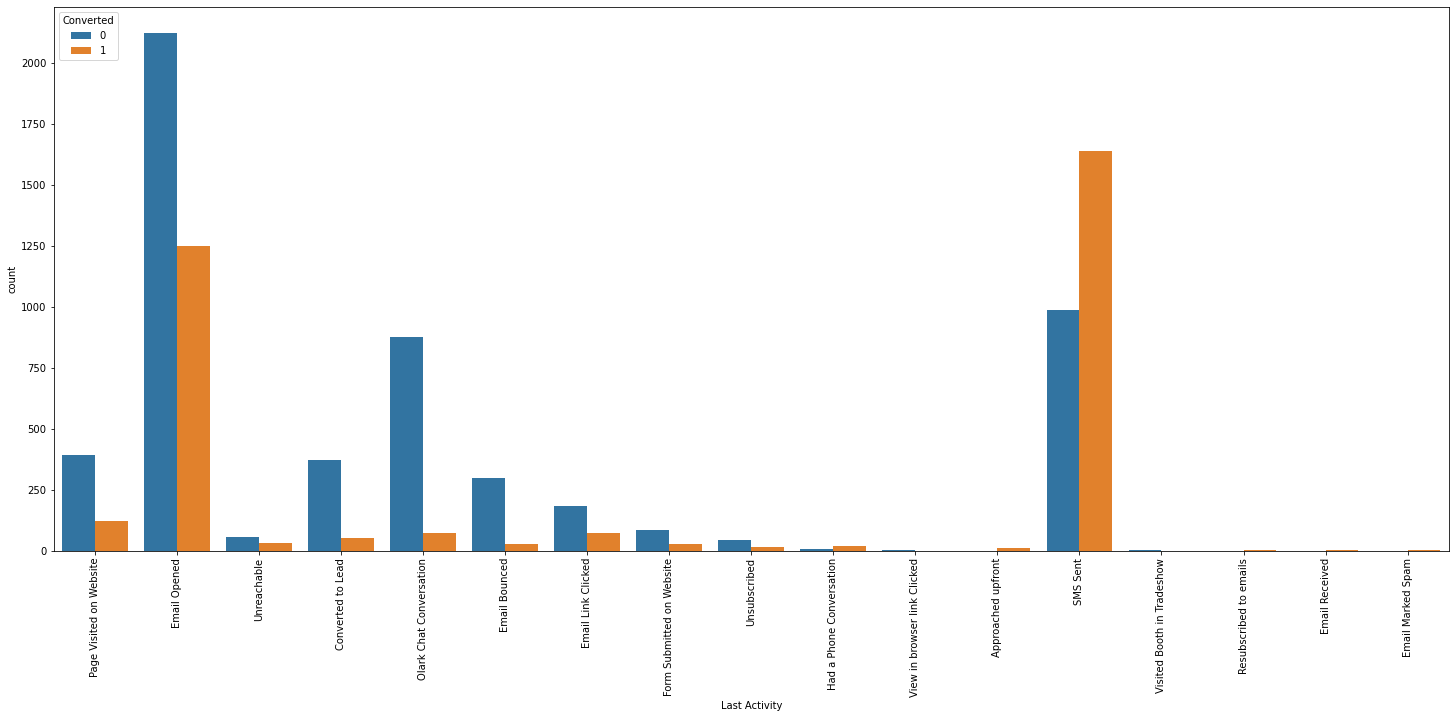

In [67]:
plt.figure(figsize=(25,10))
sns.countplot(data=leads,x='Last Activity',hue='Converted')
plt.xticks(rotation=90)
plt.show()

For Last Activity of the customer, conversion rate is higher for those whom SMS has been sent.

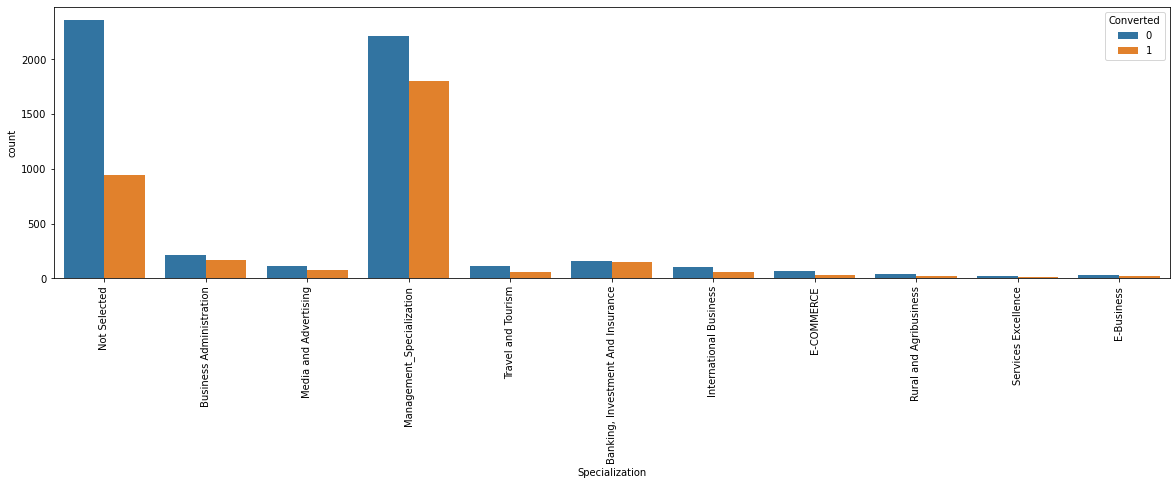

In [68]:
plt.figure(figsize=(20,5))
sns.countplot(data=leads,x='Specialization',hue='Converted')
plt.xticks(rotation=90)
plt.show()

Customers working in the field of Banking, Investment & Insurance, Business Administration, Media & Advertising, Management_Specialization seems to have good conversion rate.

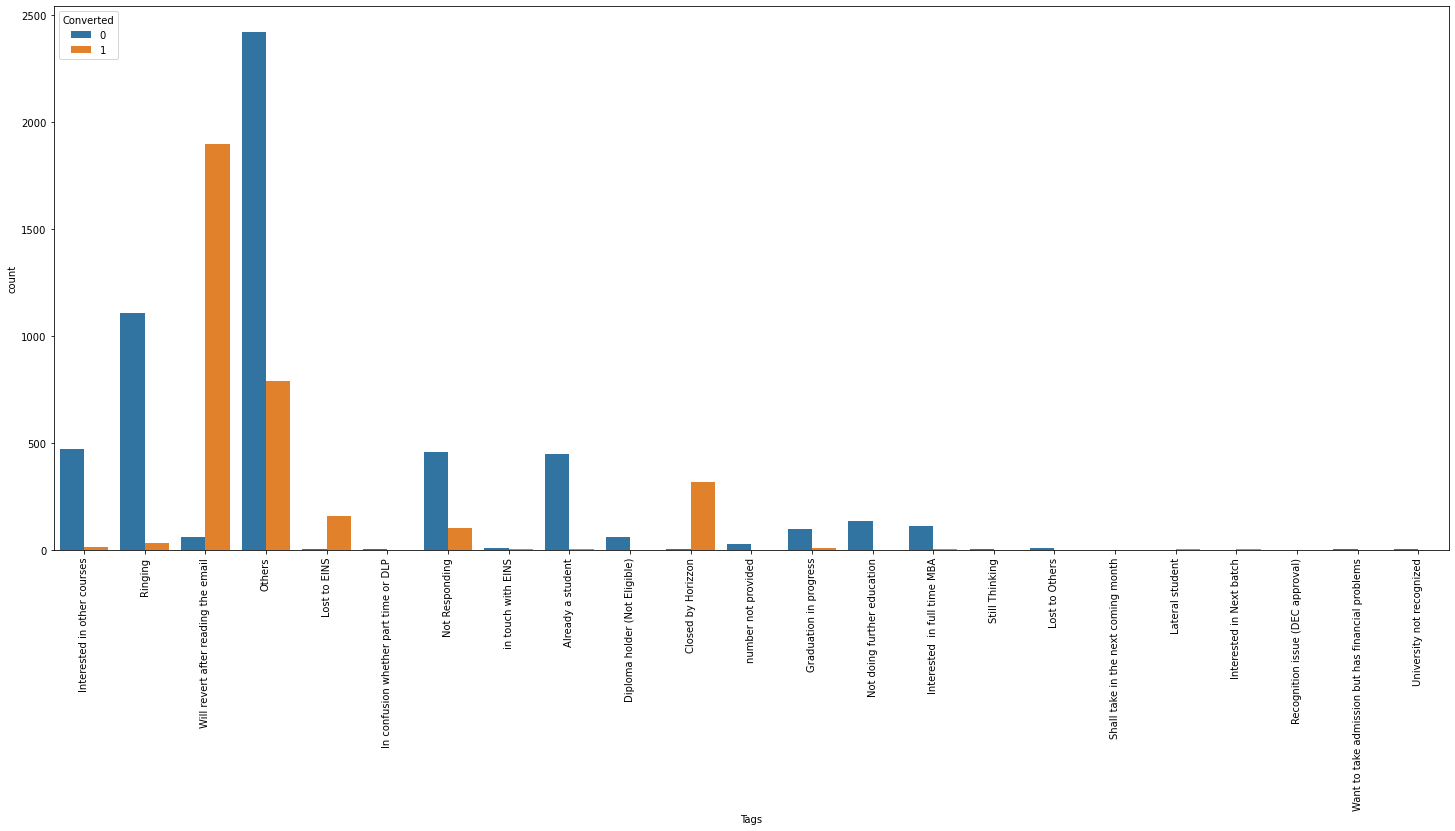

In [69]:
plt.figure(figsize=(25,10))
sns.countplot(data=leads,x='Tags',hue='Converted')
plt.xticks(rotation=90)
plt.show()

Tags assigned as Will revert after reading the email, Lost to EINS, Closed by Horizon seems to have higher conversion rates.

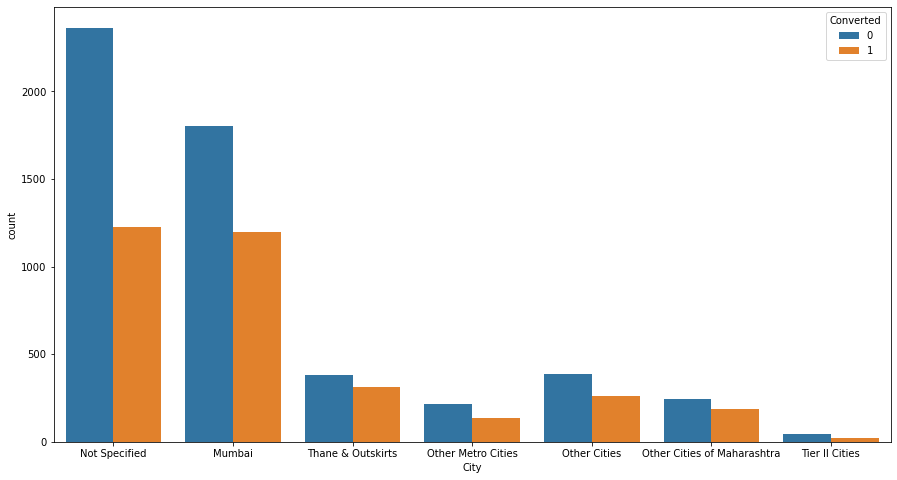

In [70]:
plt.figure(figsize=(15,8))
sns.countplot(data=leads,x='City',hue='Converted')
plt.show()

Customers staying in Thane & Outskirts and Other Cities of Maharashtra seems to have good conversion rates.

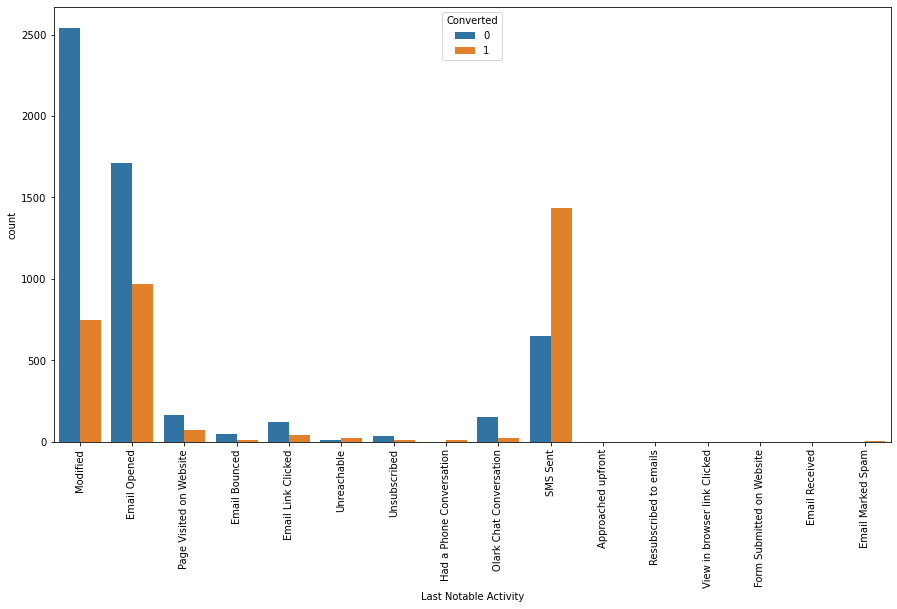

In [71]:
plt.figure(figsize=(15,8))
sns.countplot(data=leads,x='Last Notable Activity',hue='Converted')
plt.xticks(rotation=90)
plt.show()

Customers whose last notable activity is SMS sent and had a phone conversation seems to have higher conversion rate.

### Step 4: Data Preparation

In [72]:
# converting binary variable yes/no to 1/0
leads['Do Not Email']=leads['Do Not Email'].map({'Yes':1, 'No':0})
leads['A free copy of Mastering The Interview']=leads['A free copy of Mastering The Interview'].map({'Yes':1, 'No':0})
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Selected,Unemployed,Interested in other courses,Not Specified,0,Modified
1,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Selected,Unemployed,Ringing,Not Specified,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Selected,Unemployed,Will revert after reading the email,Mumbai,0,Modified


In [73]:
# For categorical variables with multiple levels, create dummy features (one-hot encoded)
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads[['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation',
                              'Tags','City','Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
leads = pd.concat([leads, dummy1], axis=1)
leads.shape

(8773, 110)

In [74]:
leads.drop(['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation',
                              'Tags','City','Last Notable Activity'],axis=1, inplace=True)

In [75]:
leads.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,0,1,2.0,1532,2.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,1.0,305,1.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,660681,0,1,2.0,1428,1.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


### Step 5: Test - Train Split

In [76]:
import sklearn
from sklearn.model_selection import train_test_split

In [77]:
leads_train, leads_test=train_test_split(leads, train_size=0.7, random_state=100)
print(leads_train.shape)
print(leads_test.shape)

(6141, 102)
(2632, 102)


### Step 6: Feature Scaling

In [78]:
# rescaling the variables using min-max scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
num_vars=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
leads_train[num_vars]=scaler.fit_transform(leads_train[num_vars])
leads_train.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5602,606986,0,1,0.333333,0.350023,0.333333,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
5036,611478,0,1,0.000000,0.000000,0.000000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8970,581574,0,0,0.111111,0.145241,0.111111,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5328,608960,0,0,0.222222,0.100135,0.222222,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1929,640995,0,0,0.555556,0.097429,0.555556,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
# X-train, y-train
y_train=leads_train.pop('Converted')
X_train=leads_train.iloc[:,1:]

In [80]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5602,0,0.333333,0.350023,0.333333,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5036,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8970,0,0.111111,0.145241,0.111111,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5328,0,0.222222,0.100135,0.222222,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1929,0,0.555556,0.097429,0.555556,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
y_train.head()

5602    1
5036    1
8970    0
5328    0
1929    0
Name: Converted, dtype: int64

In [82]:
# Checking the Conversion Rate
Conversion_Rate = (sum(leads['Converted'])/len(leads['Converted']))*100
Conversion_Rate

38.0599566852844

### Step 7: Model Building using RFE

In [83]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [84]:
# selecting 15 variables
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [85]:
rfe.support_

array([False, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True,  True, False, False,  True,  True, False,  True,
       False, False, False, False,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False])

In [86]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 4),
 ('TotalVisits', False, 23),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 24),
 ('A free copy of Mastering The Interview', False, 74),
 ('Lead Origin_Landing Page Submission', False, 10),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 54),
 ('Lead Origin_Quick Add Form', False, 27),
 ('Lead Source_Direct Traffic', False, 33),
 ('Lead Source_Facebook', False, 59),
 ('Lead Source_Google', False, 45),
 ('Lead Source_Live Chat', False, 79),
 ('Lead Source_NC_EDM', False, 82),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 44),
 ('Lead Source_Pay per Click Ads', False, 78),
 ('Lead Source_Press_Release', False, 77),
 ('Lead Source_Reference', False, 9),
 ('Lead Source_Referral Sites', False, 34),
 ('Lead Source_Social Media', False, 58),
 ('Lead Source_WeLearn', False, 72),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 62),
 ('Lead Source_blog', 

In [87]:
col = X_train.columns[rfe.support_]

In [88]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last A

In [89]:
# assessing model with stats model
import statsmodels.api as sm

# Logistic regression model
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6141
Model:                            GLM   Df Residuals:                     6125
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1279.1
Date:                Tue, 18 Oct 2022   Deviance:                       2558.3
Time:                        07:41:34   Pearson chi2:                 8.02e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5975
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.5677      0.170    -26.904      0.000      -4.900      -4.235
Total Time Spent on Website                  4.3191      0.243     17.794      0.000       3.843       4.795
Lead Origin_Lead Add Form                    1.7904      0.353      5.072      0.000       1.099       2.482
Lead Source_Olark Chat                       1.4046      0.149      9.450      0.000       1.113       1.696
Lead Source_Welingak Website                 3.7875      0.809      4.681      0.000       2.202       5.373
Last Activity_Olark Chat Conversation       -1.6414      0.231     -7.092      0.000      -2.095      -1.188
Tags_Closed by Horizzon                      7.4514      0.739     10.081      0.000       6.003       8.900
Tags_Lateral student                        27.0158   8.34e+04      0.000      1.000   -1.63e+05    1.64e+05
Tags_Lost to EINS                            6.9044      0.618     11.166      0.000       5.692       8.116
Tags_Not doing further education           -21.1599   1.28e+04     -0.002      0.999   -2.51e+04    2.51e+04
Tags_Others                                  1.5533      0.145     10.749      0.000       1.270       1.837
Tags_Ringing                                -2.0472      0.267     -7.658      0.000      -2.571      -1.523
Tags_Will revert after reading the email     5.9248      0.214     27.647      0.000       5.505       6.345
Tags_in touch with EINS                      2.3711      0.932      2.545      0.011       0.545       4.197
Tags_number not provided                   -23.2391   2.61e+04     -0.001      0.999   -5.12e+04    5.11e+04
Last Notable Activity_SMS Sent               2.6305      0.127     20.710      0.000       2.382       2.879
============================================================================================================
"""

In [90]:
# dropping the variable 'Tags_Lateral student' as it has p-value>0.05
col=col.drop('Tags_Lateral student',1)

In [91]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6141
Model:                            GLM   Df Residuals:                     6126
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1283.2
Date:                Tue, 18 Oct 2022   Deviance:                       2566.4
Time:                        07:41:34   Pearson chi2:                 8.06e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5969
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.5407      0.169    -26.944      0.000      -4.871      -4.210
Total Time Spent on Website                  4.3109      0.242     17.798      0.000       3.836       4.786
Lead Origin_Lead Add Form                    1.8486      0.350      5.276      0.000       1.162       2.535
Lead Source_Olark Chat                       1.4001      0.148      9.435      0.000       1.109       1.691
Lead Source_Welingak Website                 3.7264      0.808      4.612      0.000       2.143       5.310
Last Activity_Olark Chat Conversation       -1.6412      0.231     -7.099      0.000      -2.094      -1.188
Tags_Closed by Horizzon                      7.4055      0.738     10.035      0.000       5.959       8.852
Tags_Lost to EINS                            6.8776      0.618     11.128      0.000       5.666       8.089
Tags_Not doing further education           -21.1845   1.28e+04     -0.002      0.999   -2.52e+04    2.51e+04
Tags_Others                                  1.5300      0.143     10.665      0.000       1.249       1.811
Tags_Ringing                                -2.0707      0.267     -7.763      0.000      -2.593      -1.548
Tags_Will revert after reading the email     5.8944      0.213     27.666      0.000       5.477       6.312
Tags_in touch with EINS                      2.3473      0.931      2.521      0.012       0.522       4.172
Tags_number not provided                   -23.2579   2.61e+04     -0.001      0.999   -5.12e+04    5.12e+04
Last Notable Activity_SMS Sent               2.6265      0.127     20.729      0.000       2.378       2.875
============================================================================================================
"""

In [92]:
# checking vif

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Total Time Spent on Website,2.07
10,Tags_Will revert after reading the email,2.04
1,Lead Origin_Lead Add Form,1.82
2,Lead Source_Olark Chat,1.76
8,Tags_Others,1.76
13,Last Notable Activity_SMS Sent,1.53
4,Last Activity_Olark Chat Conversation,1.42
5,Tags_Closed by Horizzon,1.37
3,Lead Source_Welingak Website,1.31
9,Tags_Ringing,1.17


In [93]:
# dropping the variable 'Tags_Not doing further education' as it has p-value>0.05 and high VIF (compared with 'no. not provided')
col=col.drop('Tags_Not doing further education',1)

In [94]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6141
Model:                            GLM   Df Residuals:                     6127
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1286.5
Date:                Tue, 18 Oct 2022   Deviance:                       2573.0
Time:                        07:41:35   Pearson chi2:                 8.17e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.5965
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.5980      0.168    -27.431      0.000      -4.927      -4.269
Total Time Spent on Website                  4.3172      0.242     17.842      0.000       3.843       4.791
Lead Origin_Lead Add Form                    1.8479      0.350      5.281      0.000       1.162       2.534
Lead Source_Olark Chat                       1.4059      0.149      9.463      0.000       1.115       1.697
Lead Source_Welingak Website                 3.7325      0.808      4.620      0.000       2.149       5.316
Last Activity_Olark Chat Conversation       -1.6376      0.231     -7.078      0.000      -2.091      -1.184
Tags_Closed by Horizzon                      7.4614      0.738     10.113      0.000       6.015       8.907
Tags_Lost to EINS                            6.9320      0.618     11.220      0.000       5.721       8.143
Tags_Others                                  1.5795      0.143     11.065      0.000       1.300       1.859
Tags_Ringing                                -2.0312      0.267     -7.618      0.000      -2.554      -1.509
Tags_Will revert after reading the email     5.9483      0.212     27.999      0.000       5.532       6.365
Tags_in touch with EINS                      2.4008      0.932      2.577      0.010       0.575       4.227
Tags_number not provided                   -22.2178   1.58e+04     -0.001      0.999    -3.1e+04     3.1e+04
Last Notable Activity_SMS Sent               2.6439      0.127     20.855      0.000       2.395       2.892
============================================================================================================
"""

In [95]:
# dropping the variable 'Tags_number not provided' as it has p-value>0.05
col=col.drop('Tags_number not provided',1)

In [96]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6141
Model:                            GLM   Df Residuals:                     6128
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1290.0
Date:                Tue, 18 Oct 2022   Deviance:                       2580.1
Time:                        07:41:35   Pearson chi2:                 8.13e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5960
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.6172      0.168    -27.509      0.000      -4.946      -4.288
Total Time Spent on Website                  4.2864      0.241     17.779      0.000       3.814       4.759
Lead Origin_Lead Add Form                    1.8453      0.350      5.272      0.000       1.159       2.531
Lead Source_Olark Chat                       1.4010      0.148      9.442      0.000       1.110       1.692
Lead Source_Welingak Website                 3.7254      0.808      4.612      0.000       2.142       5.309
Last Activity_Olark Chat Conversation       -1.6383      0.231     -7.083      0.000      -2.092      -1.185
Tags_Closed by Horizzon                      7.4861      0.738     10.147      0.000       6.040       8.932
Tags_Lost to EINS                            6.9576      0.618     11.263      0.000       5.747       8.168
Tags_Others                                  1.6104      0.143     11.273      0.000       1.330       1.890
Tags_Ringing                                -1.9896      0.266     -7.475      0.000      -2.511      -1.468
Tags_Will revert after reading the email     5.9751      0.213     28.116      0.000       5.559       6.392
Tags_in touch with EINS                      2.4288      0.930      2.613      0.009       0.607       4.251
Last Notable Activity_SMS Sent               2.6322      0.126     20.819      0.000       2.384       2.880
============================================================================================================
"""

In [97]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Total Time Spent on Website,2.04
9,Tags_Will revert after reading the email,2.03
1,Lead Origin_Lead Add Form,1.82
2,Lead Source_Olark Chat,1.75
7,Tags_Others,1.75
11,Last Notable Activity_SMS Sent,1.53
4,Last Activity_Olark Chat Conversation,1.42
5,Tags_Closed by Horizzon,1.37
3,Lead Source_Welingak Website,1.31
8,Tags_Ringing,1.17


In [98]:
# dropping the variable 'Tags_in touch with EINS' as it has p-value>0.05
col=col.drop('Tags_in touch with EINS',1)

In [99]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6141
Model:                            GLM   Df Residuals:                     6129
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1292.7
Date:                Tue, 18 Oct 2022   Deviance:                       2585.4
Time:                        07:41:36   Pearson chi2:                 8.17e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5957
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.5867      0.166    -27.558      0.000      -4.913      -4.260
Total Time Spent on Website                  4.2921      0.241     17.827      0.000       3.820       4.764
Lead Origin_Lead Add Form                    1.8443      0.350      5.276      0.000       1.159       2.529
Lead Source_Olark Chat                       1.4036      0.148      9.465      0.000       1.113       1.694
Lead Source_Welingak Website                 3.7274      0.808      4.615      0.000       2.145       5.310
Last Activity_Olark Chat Conversation       -1.6399      0.231     -7.091      0.000      -2.093      -1.187
Tags_Closed by Horizzon                      7.4551      0.737     10.109      0.000       6.010       8.900
Tags_Lost to EINS                            6.9260      0.617     11.218      0.000       5.716       8.136
Tags_Others                                  1.5800      0.141     11.174      0.000       1.303       1.857
Tags_Ringing                                -2.0150      0.266     -7.589      0.000      -2.535      -1.495
Tags_Will revert after reading the email     5.9441      0.211     28.109      0.000       5.530       6.359
Last Notable Activity_SMS Sent               2.6234      0.126     20.822      0.000       2.376       2.870
============================================================================================================
"""

In [100]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Total Time Spent on Website,2.04
9,Tags_Will revert after reading the email,2.03
1,Lead Origin_Lead Add Form,1.82
2,Lead Source_Olark Chat,1.75
7,Tags_Others,1.75
10,Last Notable Activity_SMS Sent,1.53
4,Last Activity_Olark Chat Conversation,1.42
5,Tags_Closed by Horizzon,1.37
3,Lead Source_Welingak Website,1.31
8,Tags_Ringing,1.17


We can consider the above model as the final model as all the variables are having p value < 0.05 and VIF is also less than or equal to 2 for all the variables.

In [101]:
# predicting y-variable
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [102]:
y_train_pred[:10]

array([0.3867753 , 0.99543351, 0.01864676, 0.00208299, 0.06988085,
       0.06584066, 0.01055869, 0.06430949, 0.03060105, 0.00356962])

In [103]:
# Creating a dataframe with the actual Converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID
0,1,0.386775,5602
1,1,0.995434,5036
2,0,0.018647,8970
3,0,0.002083,5328
4,0,0.069881,1929


In [104]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,predicted
0,1,0.386775,5602,0
1,1,0.995434,5036,1
2,0,0.018647,8970,0
3,0,0.002083,5328,0
4,0,0.069881,1929,0


In [105]:
# confusion matrix
from sklearn import metrics

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3668  149]
 [ 324 2000]]


In [106]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9229767138902459


#### Metrics beyond accuracy

In [107]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [108]:
# Sensitivity of our logistic regression model
TP / float(TP+FN)

0.8605851979345955

In [109]:
# Specificity
TN / float(TN+FP)

0.9609641079381713

In [110]:
# false postive rate - predicting Converted when customer does not Converted
print(FP/ float(TN+FP))

0.03903589206182866


In [111]:
# positive predictive value 
print (TP / float(TP+FP))

0.9306654257794323


In [112]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9188376753507014


### Step 9: Plotting the ROC Curve

In [113]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [114]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

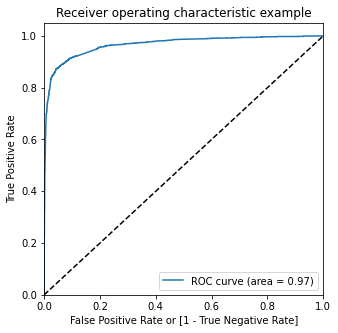

In [115]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Step 10: Finding Optimal Cutoff Point

In [116]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.386775,5602,0,1,1,1,1,0,0,0,0,0,0
1,1,0.995434,5036,1,1,1,1,1,1,1,1,1,1,1
2,0,0.018647,8970,0,1,0,0,0,0,0,0,0,0,0
3,0,0.002083,5328,0,1,0,0,0,0,0,0,0,0,0
4,0,0.069881,1929,0,1,0,0,0,0,0,0,0,0,0


In [117]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.378440  1.000000  0.000000
0.1   0.1  0.831786  0.965146  0.750589
0.2   0.2  0.904576  0.917814  0.896516
0.3   0.3  0.914509  0.898021  0.924548
0.4   0.4  0.921023  0.882100  0.944721
0.5   0.5  0.922977  0.860585  0.960964
0.6   0.6  0.922977  0.845955  0.969872
0.7   0.7  0.922000  0.833046  0.976159
0.8   0.8  0.906530  0.781411  0.982709
0.9   0.9  0.884058  0.708262  0.991092


<Figure size 2160x360 with 0 Axes>

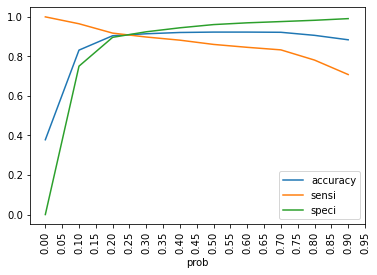

In [118]:
# Plotting accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=(30,5))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step=0.05))
plt.xticks(rotation=90)
plt.show()

From the curve above, 0.25 is the optimum point to take it as a cutoff probability.

In [119]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.25 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.386775,5602,0,1,1,1,1,0,0,0,0,0,0,1
1,1,0.995434,5036,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.018647,8970,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.002083,5328,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.069881,1929,0,1,0,0,0,0,0,0,0,0,0,0


In [120]:
# Checking the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9110893991206643

In [121]:
confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion1

array([[3489,  328],
       [ 218, 2106]], dtype=int64)

In [122]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [123]:
# Sensitivity (or recall) of our logistic regression model
TP / float(TP+FN)

0.9061962134251291

In [124]:
# Specificity
TN / float(TN+FP)

0.9140686402934242

In [125]:
# false postive rate 
print(FP/ float(TN+FP))

0.08593135970657584


In [126]:
# Positive predictive value or precision score
print (TP / float(TP+FP))

0.8652423993426458


In [127]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9411923388184515


In [128]:
from sklearn.metrics import precision_score, recall_score

In [129]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8652423993426458

In [130]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9061962134251291

#### Precision and recall tradeoff

In [131]:
from sklearn.metrics import precision_recall_curve

In [132]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       1
 2       0
 3       0
 4       0
        ..
 6136    1
 6137    0
 6138    0
 6139    0
 6140    0
 Name: Converted, Length: 6141, dtype: int64,
 0       0
 1       1
 2       0
 3       0
 4       0
        ..
 6136    1
 6137    0
 6138    0
 6139    0
 6140    0
 Name: predicted, Length: 6141, dtype: int64)

In [133]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

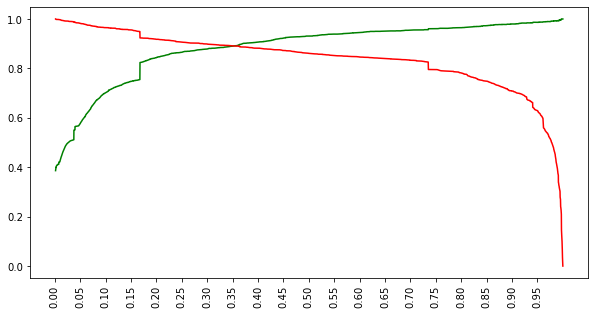

In [134]:
plt.figure(figsize=(10,5))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0,1,step=0.05))
plt.xticks(rotation=90)
plt.show()

From the curve above, 0.35 is the optimum point based on recall-precision tradeoff but at 0.25 we are getting approximately similar results in terms of conversion probability so we will take 0.25 as the cut off as we want the model to have higher sensitivity.

### Step 11: Making predictions on the test set

In [135]:
# X-test, y-test
y_test=leads_test.pop('Converted')
X_test=leads_test.iloc[:,1:]

In [136]:
print(X_test.shape)
print(y_test.shape)

(2632, 100)
(2632,)


In [137]:
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4595,0,4.0,1411,4.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
898,0,2.0,164,2.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6597,0,4.0,102,4.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8303,1,3.0,63,3.0,1,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4300,0,2.0,1271,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [139]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_SMS Sent
4595,0.636446,0,0,0,0,0,0,0,1,0,1
898,0.073974,0,0,0,0,0,0,0,1,0,0
6597,0.046008,0,0,0,0,0,0,1,0,0,0
8303,0.028417,0,0,0,0,0,0,1,0,0,0
4300,0.573297,0,0,0,0,0,0,1,0,0,0


In [140]:
X_test_sm = sm.add_constant(X_test)

#### Making predictions on the test set

In [141]:
y_test_pred = res.predict(X_test_sm)

In [142]:
y_test_pred[:10]

4595    0.223302
898     0.001862
6597    0.056828
8303    0.052914
4300    0.366786
6761    0.010742
7082    0.999043
4483    0.607183
1423    0.981318
8748    0.836459
dtype: float64

In [143]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
4595,0.223302
898,0.001862
6597,0.056828
8303,0.052914
4300,0.366786


In [144]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [145]:
# Putting CustID to index
y_test_df['Lead ID'] = y_test_df.index

In [146]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [147]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [148]:
y_pred_final.head()

,Converted,Lead ID,0
0,0,4595,0.223302
1,0,898,0.001862
2,0,6597,0.056828
3,0,8303,0.052914
4,0,4300,0.366786


In [149]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [150]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead ID','Converted','Converted_Prob'], axis=1)
y_pred_final.head()

,Lead ID,Converted,Converted_Prob
0,4595,0,0.223302
1,898,0,0.001862
2,6597,0,0.056828
3,8303,0,0.052914
4,4300,0,0.366786


In [151]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.25 else 0)
y_pred_final.head()

,Lead ID,Converted,Converted_Prob,final_predicted
0,4595,0,0.223302,0
1,898,0,0.001862,0
2,6597,0,0.056828,0
3,8303,0,0.052914,0
4,4300,0,0.366786,1


In [152]:
# Checking the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9129939209726444

In [153]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1474,  143],
       [  86,  929]], dtype=int64)

In [154]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [155]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9152709359605912

In [156]:
# Let us calculate specificity
TN / float(TN+FP)

0.9115646258503401

In [157]:
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9152709359605912

In [158]:
precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8666044776119403

#### Calculating Lead Score for complete data set

In [159]:
# merging train and test data
train1=pd.DataFrame(leads_train['Lead Number'])
train1.head()

,Lead Number
5602,606986
5036,611478
8970,581574
5328,608960
1929,640995


In [160]:
train1['Lead ID'] = train1.index

In [161]:
y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.386775,5602,0,1,1,1,1,0,0,0,0,0,0,1
1,1,0.995434,5036,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.018647,8970,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.002083,5328,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.069881,1929,0,1,0,0,0,0,0,0,0,0,0,0


In [162]:
train2=train1.merge(y_train_pred_final,on='Lead ID')
train2.head()

,Lead Number,Lead ID,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,606986,5602,1,0.386775,0,1,1,1,1,0,0,0,0,0,0,1
1,611478,5036,1,0.995434,1,1,1,1,1,1,1,1,1,1,1,1
2,581574,8970,0,0.018647,0,1,0,0,0,0,0,0,0,0,0,0
3,608960,5328,0,0.002083,0,1,0,0,0,0,0,0,0,0,0,0
4,640995,1929,0,0.069881,0,1,0,0,0,0,0,0,0,0,0,0


In [163]:
train_df=train2[['Lead ID','Lead Number','Converted','Converted_Prob','final_predicted']]

In [164]:
train_df.head()

,Lead ID,Lead Number,Converted,Converted_Prob,final_predicted
0,5602,606986,1,0.386775,1
1,5036,611478,1,0.995434,1
2,8970,581574,0,0.018647,0
3,5328,608960,0,0.002083,0
4,1929,640995,0,0.069881,0


In [165]:
test1=pd.DataFrame(leads_test['Lead Number'])
test1.head()

,Lead Number
4595,615719
898,650862
6597,599140
8303,586447
4300,618575


In [166]:
test1['Lead ID'] = test1.index

In [167]:
test2=test1.merge(y_pred_final,on='Lead ID')
test2.head()

,Lead Number,Lead ID,Converted,Converted_Prob,final_predicted
0,615719,4595,0,0.223302,0
1,650862,898,0,0.001862,0
2,599140,6597,0,0.056828,0
3,586447,8303,0,0.052914,0
4,618575,4300,0,0.366786,1


In [168]:
test_df=test2[['Lead ID','Lead Number','Converted','Converted_Prob','final_predicted']]
test_df.head()

,Lead ID,Lead Number,Converted,Converted_Prob,final_predicted
0,4595,615719,0,0.223302,0
1,898,650862,0,0.001862,0
2,6597,599140,0,0.056828,0
3,8303,586447,0,0.052914,0
4,4300,618575,0,0.366786,1


In [169]:
final_df=pd.concat([train_df,test_df],axis=0)

In [170]:
final_df.head()

,Lead ID,Lead Number,Converted,Converted_Prob,final_predicted
0,5602,606986,1,0.386775,1
1,5036,611478,1,0.995434,1
2,8970,581574,0,0.018647,0
3,5328,608960,0,0.002083,0
4,1929,640995,0,0.069881,0


In [171]:
final_df.shape   # it contains same no. of rows as the original dataframe (before splitting)

(8773, 5)

In [172]:
# Lead Score
final_df['Lead Score']=round(final_df.Converted_Prob*100,2)
final_df.head()

,Lead ID,Lead Number,Converted,Converted_Prob,final_predicted,Lead Score
0,5602,606986,1,0.386775,1,38.68
1,5036,611478,1,0.995434,1,99.54
2,8970,581574,0,0.018647,0,1.86
3,5328,608960,0,0.002083,0,0.21
4,1929,640995,0,0.069881,0,6.99


In [173]:
final_df.sort_values('Lead Score', ascending=False).iloc[:20,:]

,Lead ID,Lead Number,Converted,Converted_Prob,final_predicted,Lead Score
693,6620,598991,1,0.999987,1,100.00
944,4662,614998,1,0.999958,1,100.00
672,949,650234,1,0.999978,1,100.00
627,177,658648,1,0.999980,1,100.00
430,5942,604240,1,0.999970,1,100.00
5955,3615,625862,1,0.999976,1,100.00
2214,7234,593962,1,0.999874,1,99.99
1502,936,650338,1,0.999897,1,99.99
3238,4062,621078,1,0.999913,1,99.99
2306,2688,633904,1,0.999929,1,99.99


In [176]:
# Fianl dataframe having Lead scores in the descending order
df_final=final_df.sort_values('Lead Score', ascending=False)
df_final

,Lead ID,Lead Number,Converted,Converted_Prob,final_predicted,Lead Score
693,6620,598991,1,0.999987,1,100.00
944,4662,614998,1,0.999958,1,100.00
672,949,650234,1,0.999978,1,100.00
627,177,658648,1,0.999980,1,100.00
430,5942,604240,1,0.999970,1,100.00
...,...,...,...,...,...,...
758,863,651339,0,0.000378,0,0.04
269,8614,584023,0,0.000443,0,0.04
698,1461,644871,0,0.000302,0,0.03
1763,3276,628594,0,0.000317,0,0.03


### Conclusion

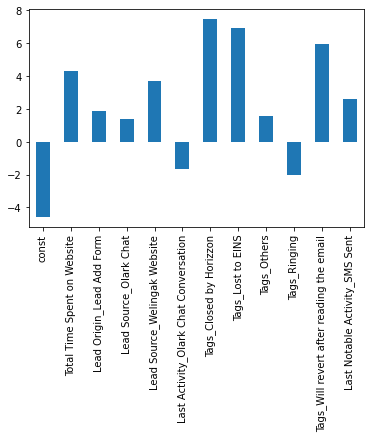

In [177]:
res.params.plot.bar()
plt.show()

Top 3 predictors for higher conversions are:
- Tags_Closed by horizzon
- Tags_Lost to EINS
- Tags_Will revert after reading the email

We have taken cut-off point at 0.25
- For Train Data:
Accuracy = 91.10,
Sensitivity or Recall = 90.61,
Specificity = 91.40,
Precision = 86.52

- For Test Data:
Accuracy = 91.29,
Sensitivity or Recall = 91.52,
Specificity = 91.16,
Precision = 86.66